In [10]:
import pandas
import scipy
import numpy
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

In [3]:
data = pandas.read_csv(u'C:\\Users\\Dmi\\Desktop\MatLab\\Coursera\\Введение в машинное обучение\\Неделя 5\\abalone.csv',
                      header = 0)
print data.head()

  Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   M   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   F   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3   M   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4   I   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7  


In [4]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
X = data.ix[:, :-1]
y = data.ix[:, -1]

In [7]:
print X, y

      Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  \
0       1   0.455     0.365   0.095       0.5140         0.2245   
1       1   0.350     0.265   0.090       0.2255         0.0995   
2      -1   0.530     0.420   0.135       0.6770         0.2565   
3       1   0.440     0.365   0.125       0.5160         0.2155   
4       0   0.330     0.255   0.080       0.2050         0.0895   
5       0   0.425     0.300   0.095       0.3515         0.1410   
6      -1   0.530     0.415   0.150       0.7775         0.2370   
7      -1   0.545     0.425   0.125       0.7680         0.2940   
8       1   0.475     0.370   0.125       0.5095         0.2165   
9      -1   0.550     0.440   0.150       0.8945         0.3145   
10     -1   0.525     0.380   0.140       0.6065         0.1940   
11      1   0.430     0.350   0.110       0.4060         0.1675   
12      1   0.490     0.380   0.135       0.5415         0.2175   
13     -1   0.535     0.405   0.145       0.6845         0.272

In [24]:
kf = KFold(n = len(y),
          random_state = 1,
          n_folds = 5,
          shuffle = True)

In [28]:
val = cross_val_score(estimator = clf, 
                      scoring = 'r2', 
                      X = X, 
                      y = y, 
                      cv = kf)
print val.mean()

0.534188574016


In [38]:
temp_x = []
temp_cv = []
for x in range(1, 51):
    clf = RandomForestRegressor(n_estimators = x, 
                                random_state = 1)
    val = cross_val_score(estimator = clf, 
                      scoring = 'r2', 
                      X = X, 
                      y = y, 
                      cv = kf)
    temp_x.append(x)
    temp_cv.append(round(val.mean(), 3))

In [40]:
print zip(temp_x, temp_cv)

[(1, 0.11), (2, 0.341), (3, 0.406), (4, 0.445), (5, 0.465), (6, 0.471), (7, 0.477), (8, 0.483), (9, 0.489), (10, 0.495), (11, 0.494), (12, 0.499), (13, 0.503), (14, 0.507), (15, 0.509), (16, 0.511), (17, 0.515), (18, 0.517), (19, 0.52), (20, 0.519), (21, 0.521), (22, 0.521), (23, 0.522), (24, 0.523), (25, 0.523), (26, 0.524), (27, 0.525), (28, 0.526), (29, 0.527), (30, 0.527), (31, 0.528), (32, 0.529), (33, 0.53), (34, 0.53), (35, 0.53), (36, 0.53), (37, 0.529), (38, 0.529), (39, 0.53), (40, 0.529), (41, 0.53), (42, 0.53), (43, 0.53), (44, 0.53), (45, 0.529), (46, 0.529), (47, 0.529), (48, 0.53), (49, 0.531), (50, 0.531)]


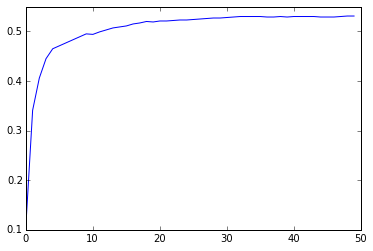

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(temp_cv)
plt.show()